# HW02 (due October 10th, 23:59)

In this homework you will investigate the *causal* of being part of a union on the number of hours worked. You will work with data from the National Longitudinal Survey. In particular, you have a panel of young women who were between 14 and 26 years of age in 1968, surveyed for 20 years.

The purpose of this homework is ot make you think about the **identification** assumptions underlying your empirical strategy, namely the assumptions that allow the coefficient estimate from the regressions to be causal. Throughout the homework you will try to address the issue of **omitted variable bias** through different strategies, that will allow to make milder identification assumptions.

# Load Data

In [3]:
##Load the NLSY dataset
import pandas as pd
#import statsmodels.formula.api as smf
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

data = pd.read_stata('https://www.stata-press.com/data/r16/nlswork.dta')
data_labels = pd.read_stata('https://www.stata-press.com/data/r16/nlswork.dta', iterator=True).variable_labels()

# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

# to make this notebook's output identical at every run
np.random.seed(42)

#  Summary statistics

Inspect the data.

In [4]:
##Visualize the dataset

data.head()

,idcode,year,birth_yr,age,race,msp,nev_mar,grade,collgrad,not_smsa,...,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
0,1,70,51,18.0,black,0.0,1.0,12.0,0,0.0,...,0.0,6.0,3.0,NaN,2.0,1.083333,0.083333,20.0,27.0,1.451214
1,1,71,51,19.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,NaN,22.0,1.275641,0.083333,44.0,10.0,1.028620
2,1,72,51,20.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,1.0,0.0,2.256410,0.916667,40.0,51.0,1.589977
3,1,73,51,21.0,black,1.0,0.0,12.0,0,0.0,...,0.0,4.0,6.0,NaN,0.0,2.314102,0.083333,40.0,3.0,1.780273
4,1,75,51,23.0,black,1.0,0.0,12.0,0,0.0,...,0.0,5.0,6.0,NaN,0.0,2.775641,0.166667,10.0,24.0,1.777012


In [5]:
data.describe()

,idcode,year,birth_yr,age,msp,nev_mar,grade,collgrad,not_smsa,c_city,south,ind_code,occ_code,union,wks_ue,ttl_exp,tenure,hours,wks_work,ln_wage
count,28534.000000,28534.000000,28534.000000,28510.000000,28518.000000,28518.000000,28532.000000,28534.000000,28526.000000,28526.000000,28526.000000,28193.000000,28413.000000,19238.000000,22830.000000,28534.000000,28101.000000,28467.000000,27831.000000,28534.000000
mean,2601.284292,77.958646,48.085091,29.045107,0.602917,0.229680,12.532595,0.168045,0.282444,0.357218,0.409556,7.692973,4.777672,0.234432,2.548095,6.215316,3.123836,36.559560,53.989328,1.674907
std,1487.358947,6.383879,3.012837,6.700584,0.489302,0.420634,2.323905,0.373913,0.450196,0.479188,0.491761,2.994025,3.065435,0.423654,7.294463,4.652117,3.751409,9.869623,29.032325,0.478093
min,1.000000,68.000000,41.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1327.000000,72.000000,46.000000,23.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,2.461539,0.500000,35.000000,36.000000,1.361496
50%,2606.000000,78.000000,48.000000,28.000000,1.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,7.000000,3.000000,0.000000,0.000000,5.057693,1.666667,40.000000,52.000000,1.640541
75%,3881.000000,83.000000,51.000000,34.000000,1.000000,0.000000,14.000000,0.000000,1.000000,1.000000,1.000000,11.000000,6.000000,0.000000,0.000000,9.128204,4.166667,40.000000,72.000000,1.964083
max,5159.000000,88.000000,54.000000,46.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,12.000000,13.000000,1.000000,76.000000,28.884615,25.916666,168.000000,104.000000,5.263916


In [4]:
data_labels

{'idcode': 'NLS ID',
 'year': 'interview year',
 'birth_yr': 'birth year',
 'age': 'age in current year',
 'race': 'race',
 'msp': '1 if married, spouse present',
 'nev_mar': '1 if never married',
 'grade': 'current grade completed',
 'collgrad': '1 if college graduate',
 'not_smsa': '1 if not SMSA',
 'c_city': '1 if central city',
 'south': '1 if south',
 'ind_code': 'industry of employment',
 'occ_code': 'occupation',
 'union': '1 if union',
 'wks_ue': 'weeks unemployed last year',
 'ttl_exp': 'total work experience',
 'tenure': 'job tenure, in years',
 'hours': 'usual hours worked',
 'wks_work': 'weeks worked last year',
 'ln_wage': 'ln(wage/GNP deflator)'}

In [7]:
##tabulate college and union status 
data.collgrad.value_counts()


collgrad
0    23739
1     4795
Name: count, dtype: int64

In [8]:
data.union.value_counts()

union
0.0    14728
1.0     4510
Name: count, dtype: int64

In [9]:
data.hours.value_counts()

hours
40.0     15368
35.0      1698
38.0      1333
20.0       996
30.0       923
         ...  
91.0         1
99.0         1
69.0         1
105.0        1
59.0         1
Name: count, Length: 85, dtype: int64

In [10]:
##Drop missing observations

data_nomiss = data.dropna(subset=['collgrad', 'union'])

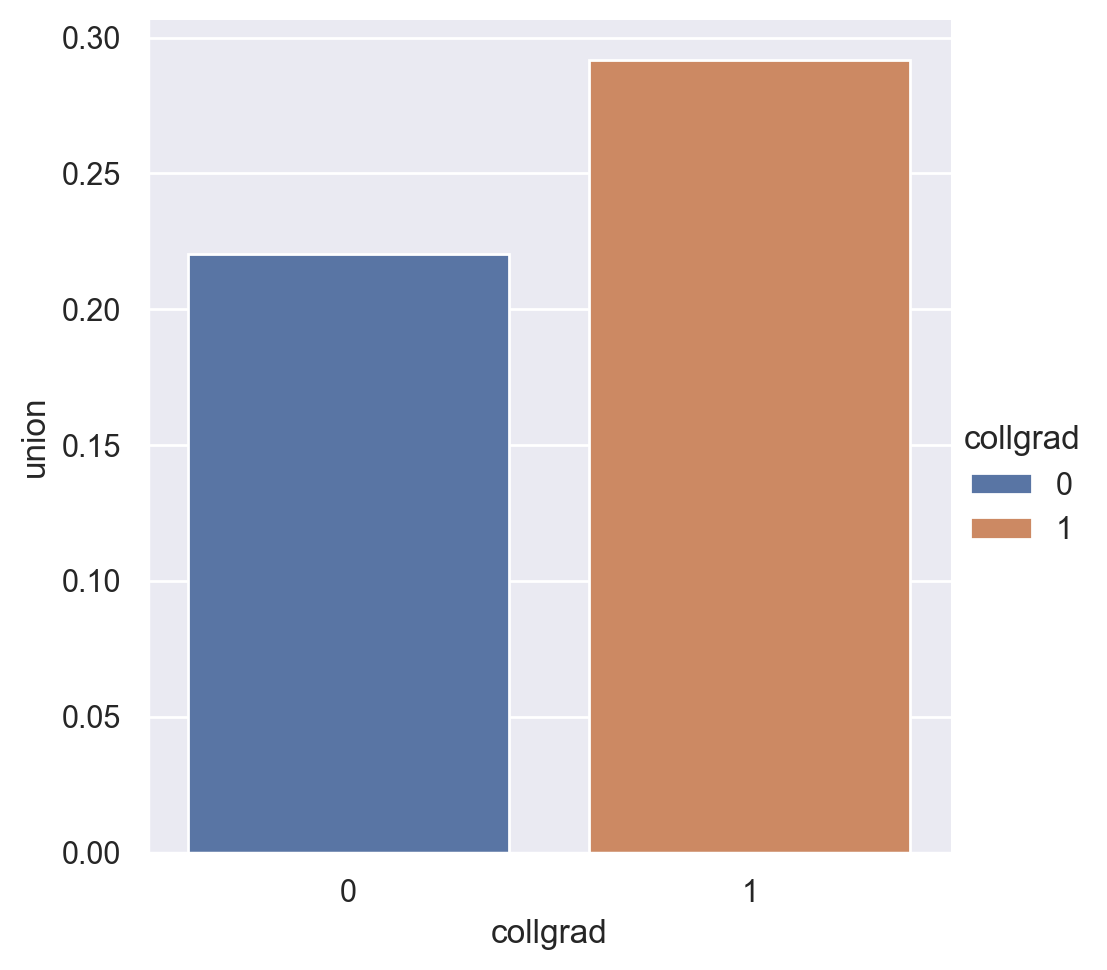

In [11]:
y = data_nomiss['union']
x = data_nomiss['collgrad']
sns.catplot(data = data_nomiss, x="collgrad", y="union", kind = 'bar', hue="collgrad",  ci=None)

<Axes: xlabel='union', ylabel='count'>

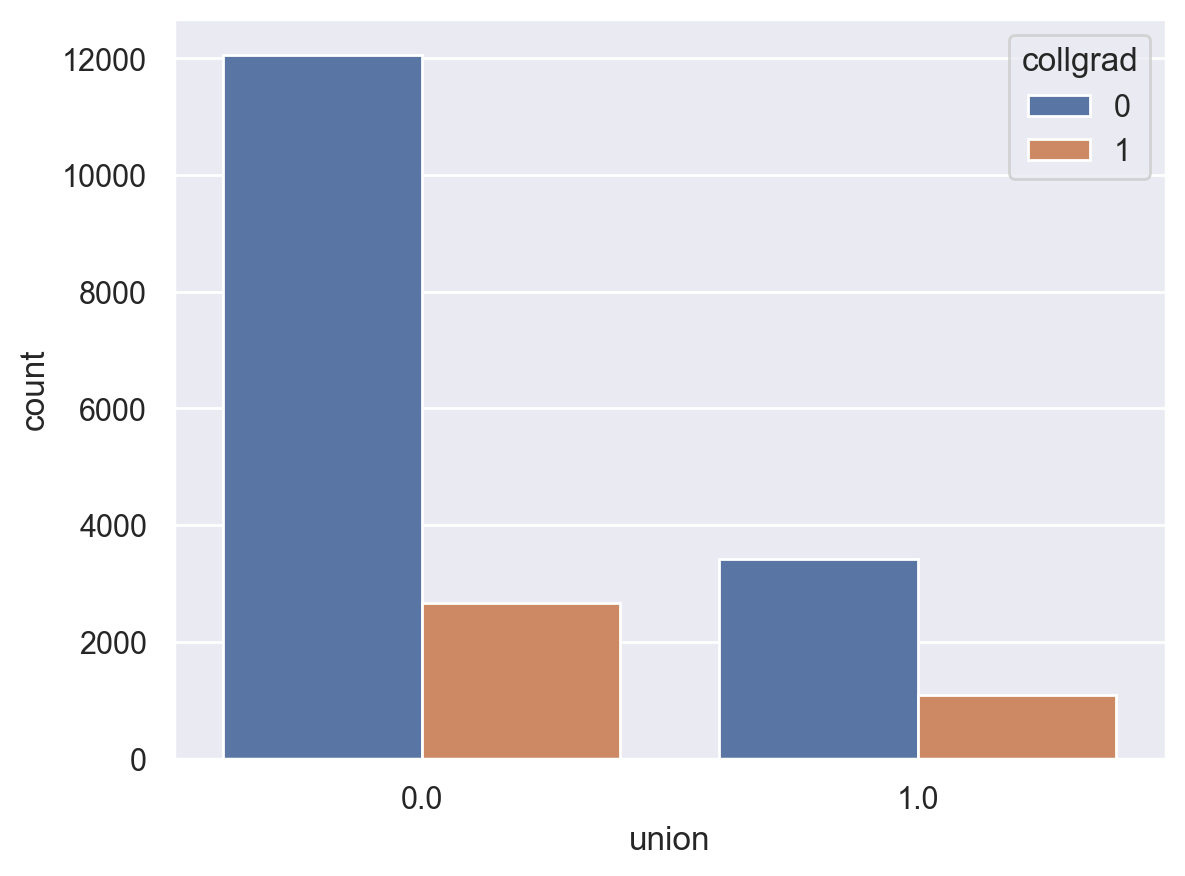

In [12]:
sns.countplot(data, x="union", hue="collgrad")

In [17]:
##generate a variable for log hours worked
logHours = np.log(data['hours'])



In [14]:
##Drop missing observations

data_nomissh = data.dropna(subset=['hours', 'union','year'])

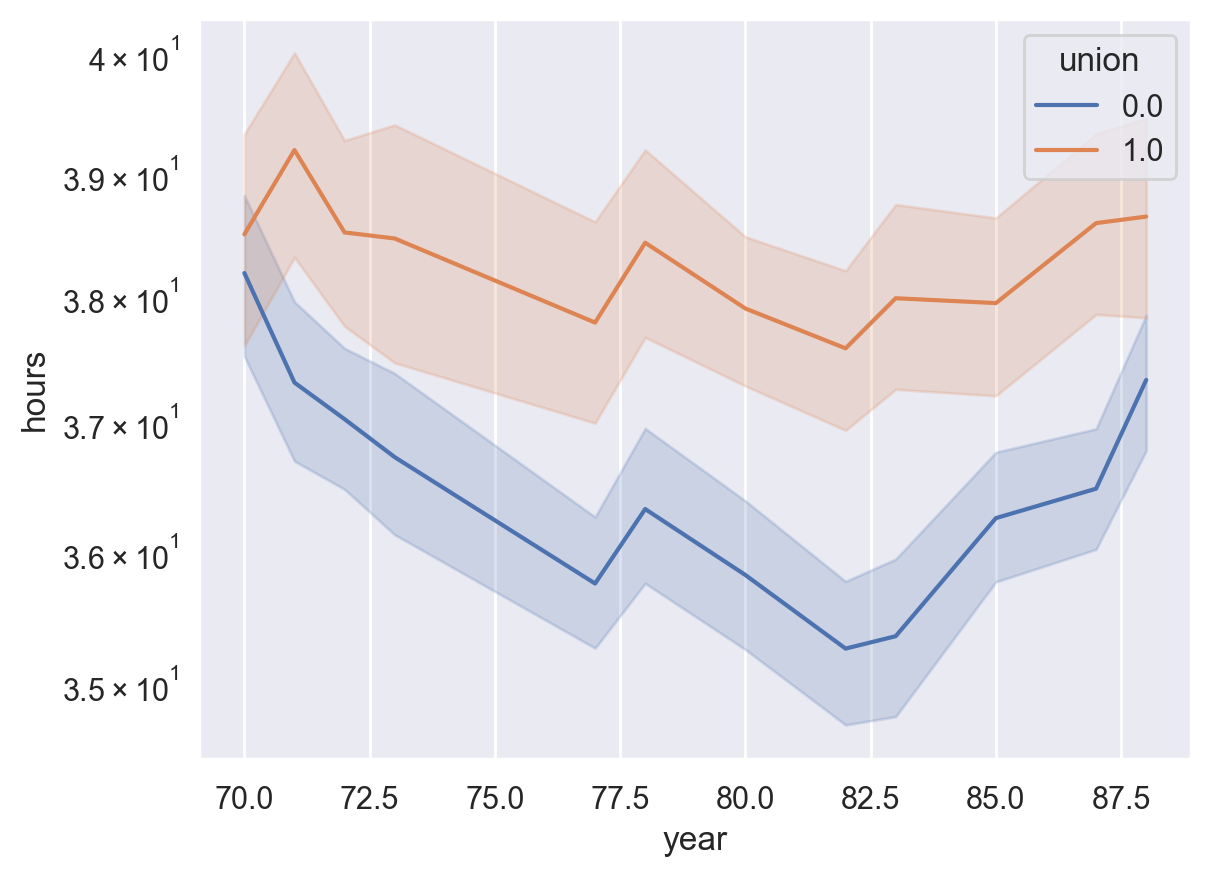

In [18]:
##plot log hours against year separately for union and non-union
import seaborn as sns
sns.lineplot(data=data_nomissh, x="year", y="hours", hue="union")
plt.yscale('log')

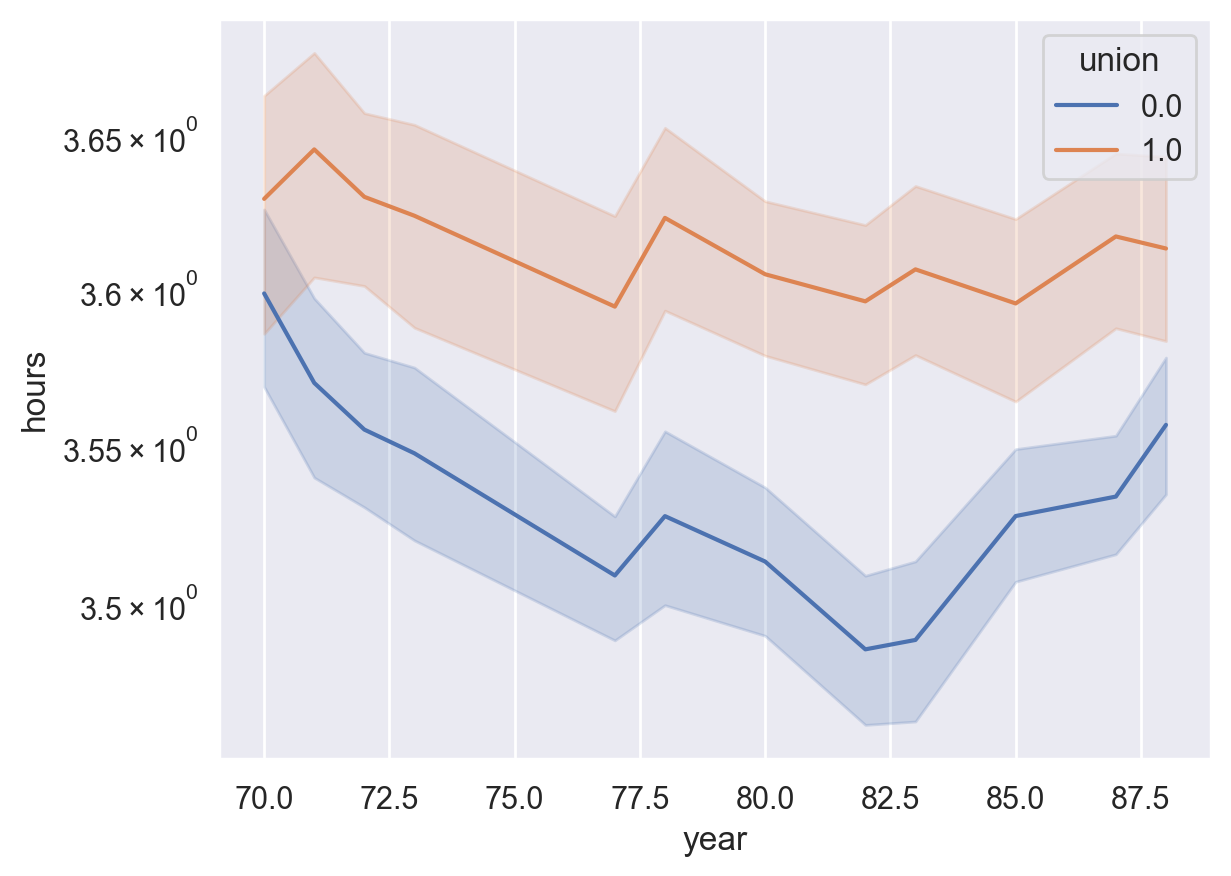

In [46]:
dflog  = pd.DataFrame()
dflog['hours'] = np.log(data_nomissh['hours'])
dflog['union'] = data_nomissHU['union']
dflog['year'] = data_nomissHU['year']
sns.lineplot(data=dflog, x="year", y="hours", hue="union")
plt.yscale('log')


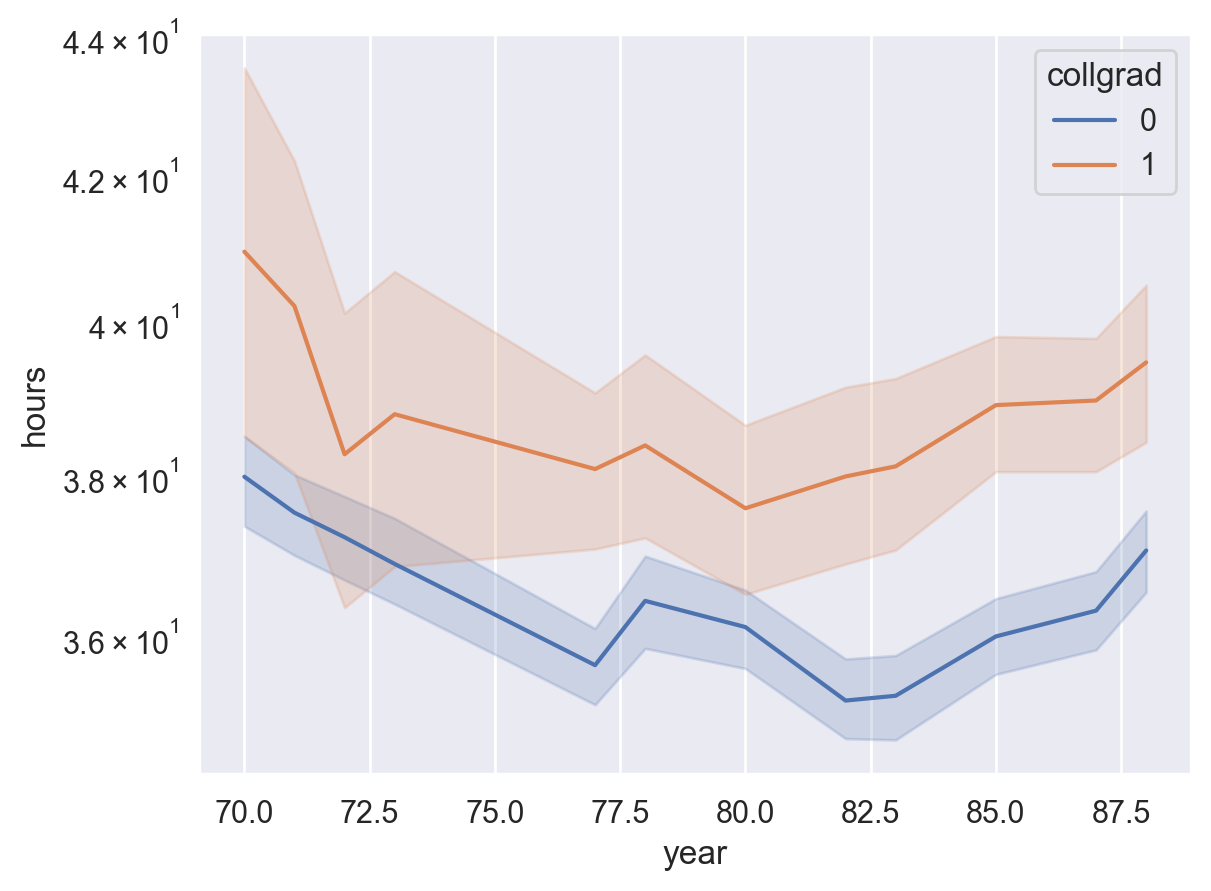

In [19]:
sns.lineplot(data=data_nomissh, x="year", y="hours", hue="collgrad")
plt.yscale('log')

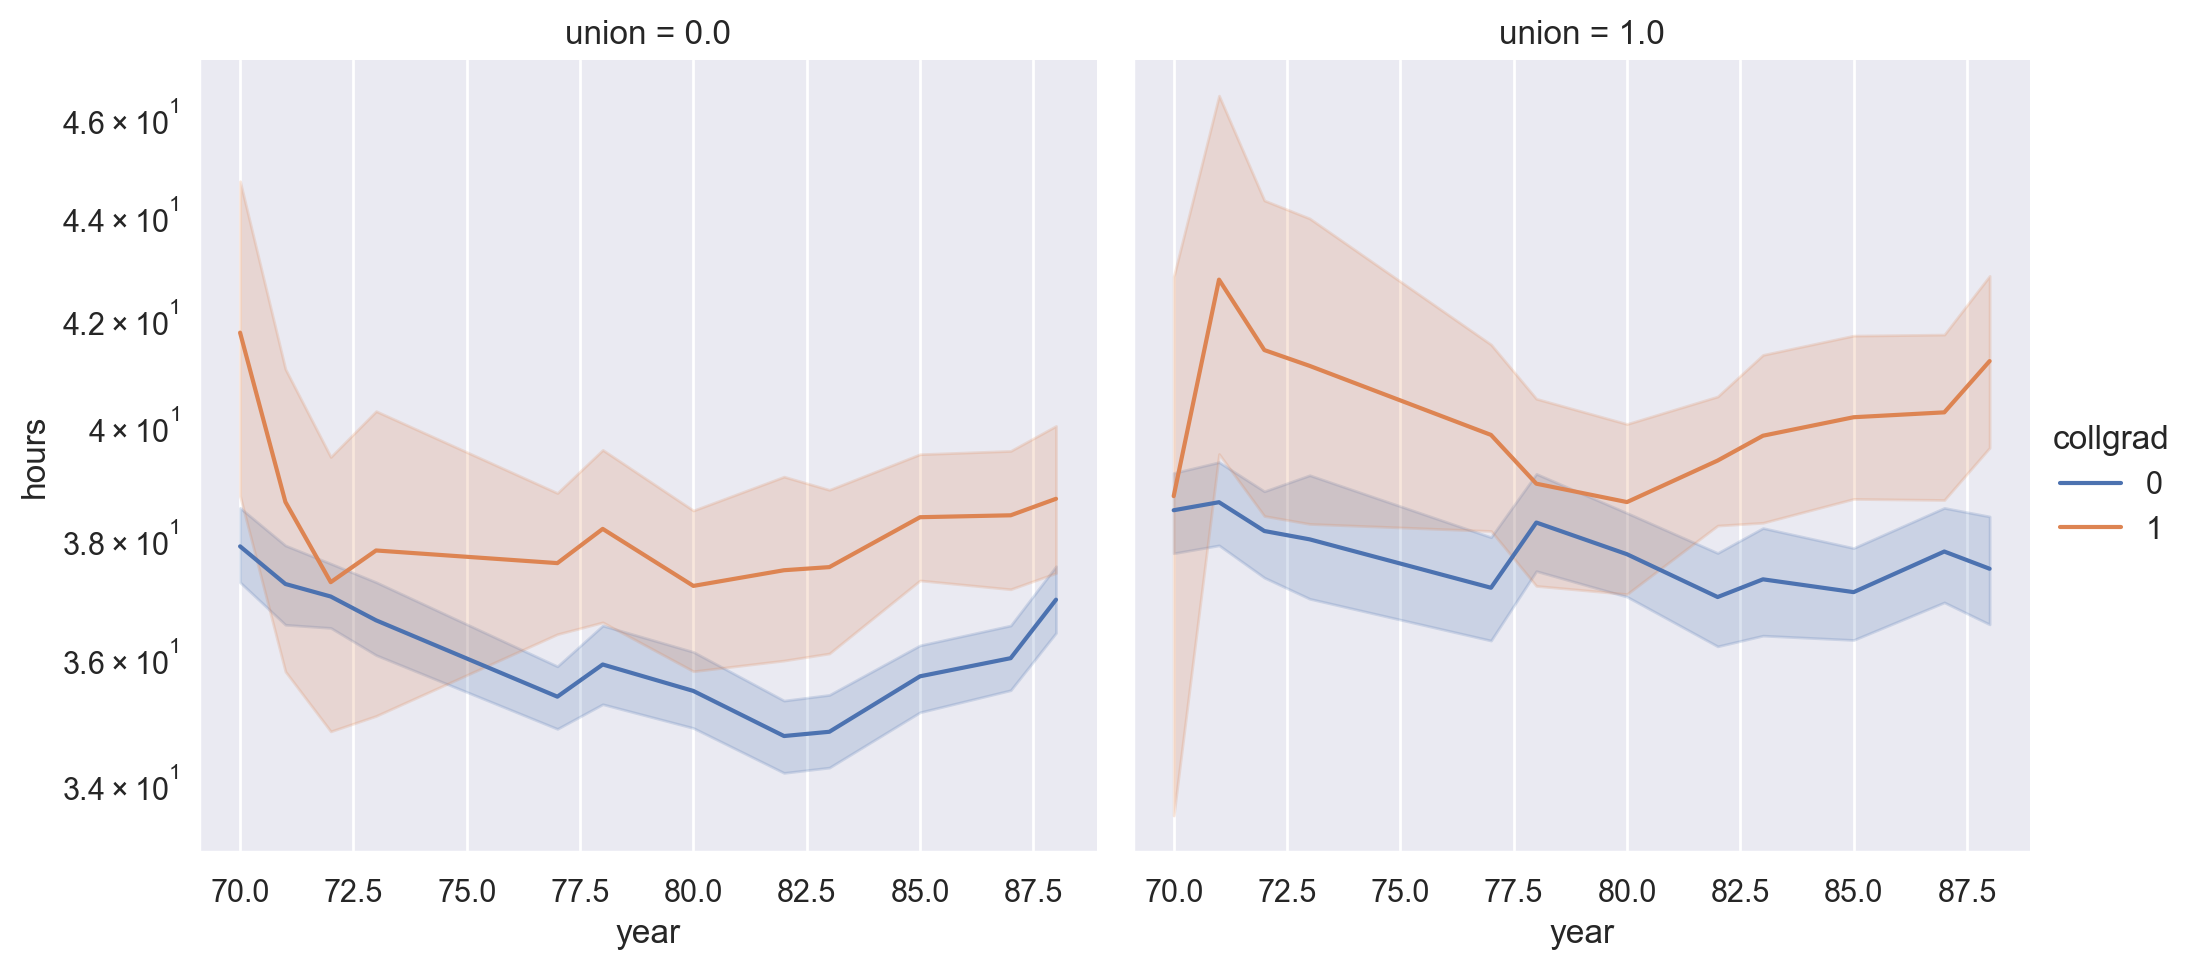

In [23]:
sns.relplot(data=data_nomissh, x="year", y="hours", col="union", hue="collgrad", kind="line")
plt.yscale('log')


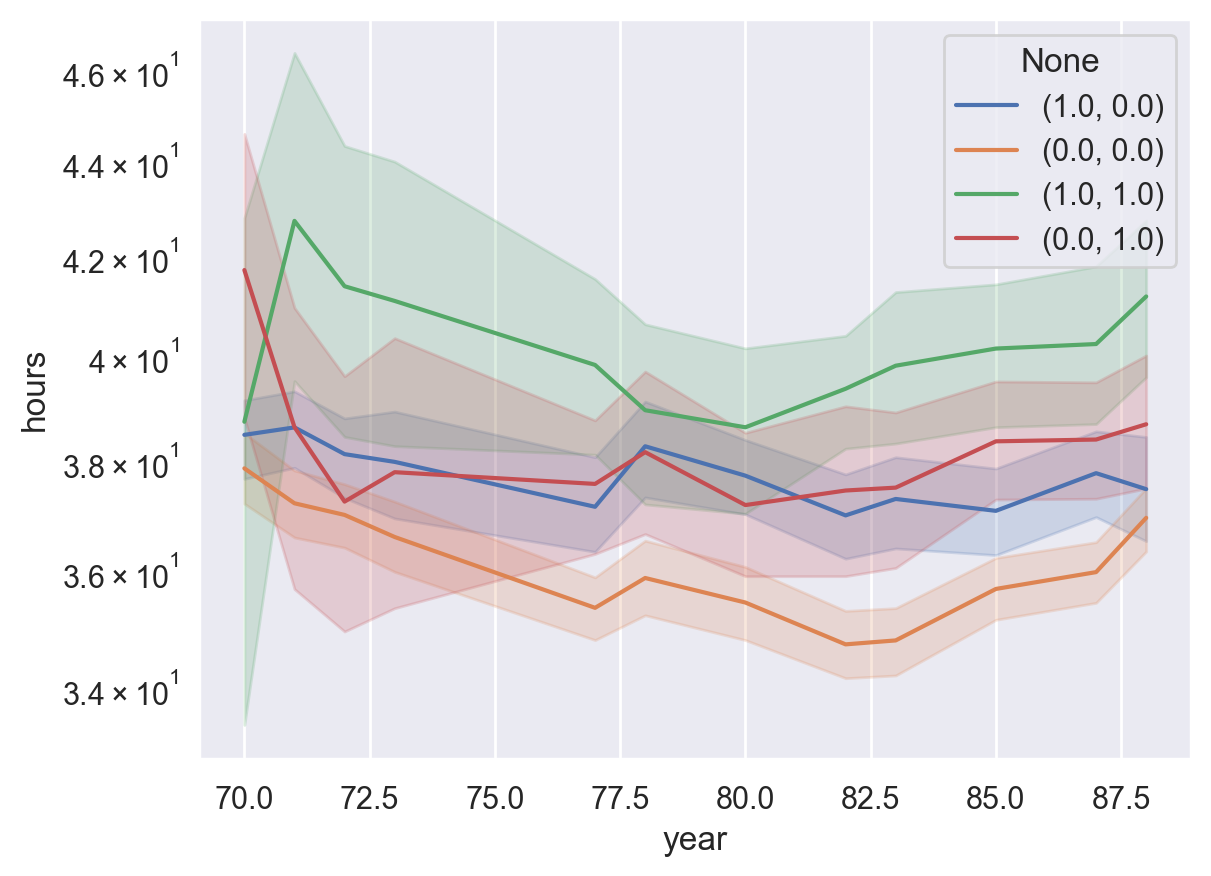

In [24]:
data_nomis3 = data.dropna(subset=['collgrad', 'union', 'year',"hours"])
sns.lineplot(data=data_nomis3, x="year", y="hours", hue=data_nomis3[['union', 'collgrad']].apply(tuple, axis=1))
plt.yscale('log')

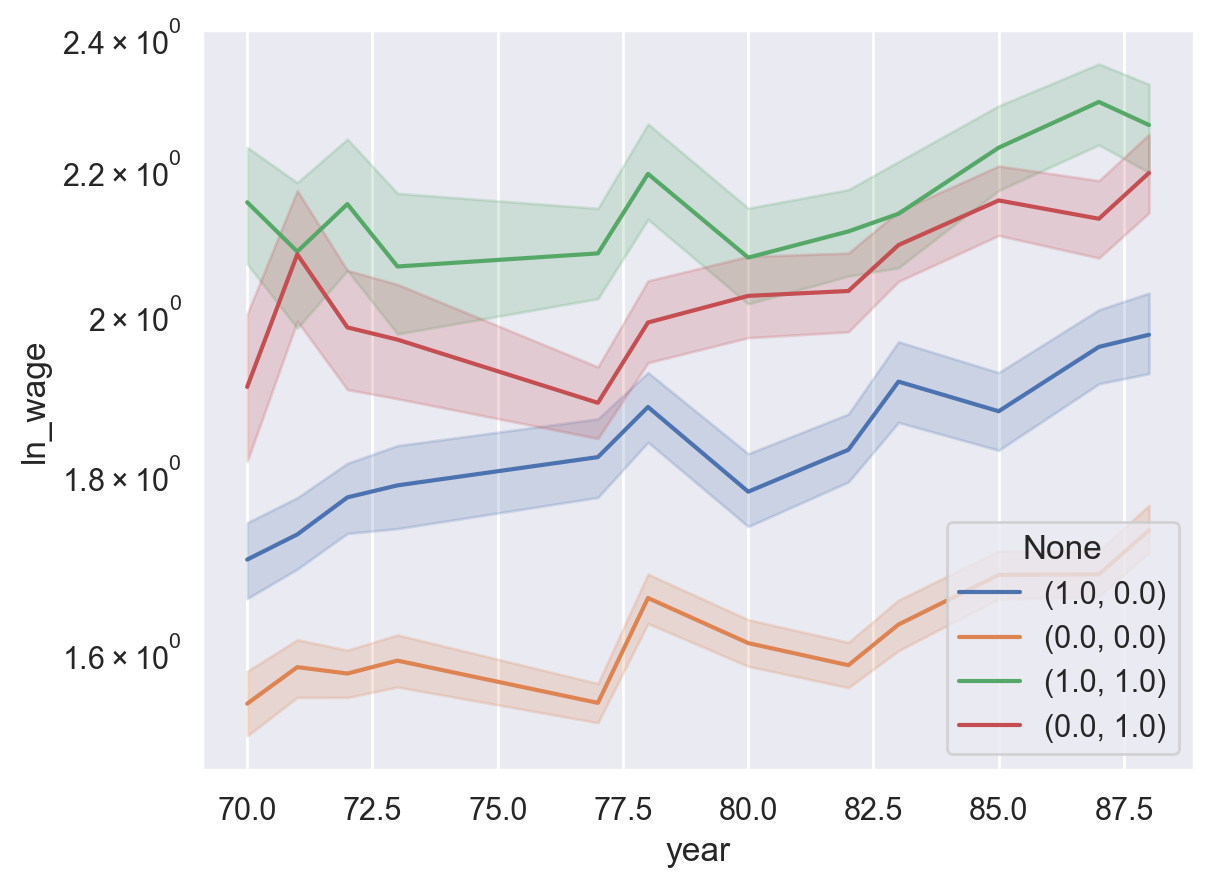

In [25]:
data_nomis4 = data.dropna(subset=['collgrad', 'union', 'year',"ln_wage"])
sns.lineplot(data=data_nomis3, x="year", y="ln_wage", hue=data_nomis3[['union', 'collgrad']].apply(tuple, axis=1))
plt.yscale('log')

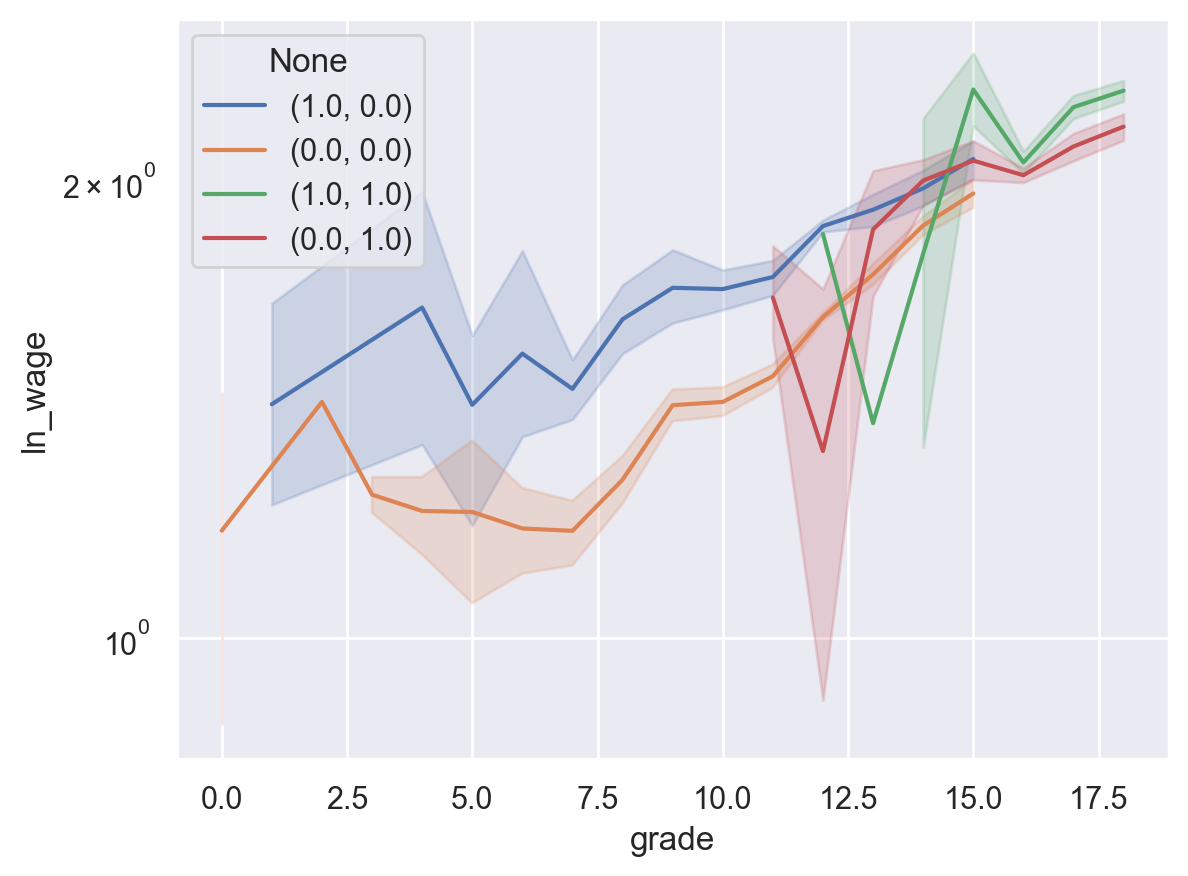

In [27]:
data_nomis5 = data.dropna(subset=['collgrad', 'union', 'grade',"ln_wage"])
sns.lineplot(data=data_nomis3, x="grade", y="ln_wage", hue=data_nomis3[['union', 'collgrad']].apply(tuple, axis=1))
plt.yscale('log')

# Regression: Effect of union status on hours worked

In [9]:
##Drop missing observations

data_nomissHU = data.dropna(subset=['hours', 'union'])
data_nomissHC = data.dropna(subset=['hours', 'collgrad'])
data_nomissHUC = data.dropna(subset=['hours', 'union','collgrad'])
data_nomissHUO = data.dropna(subset=['hours', 'union','occ_code'])


In [53]:
dfHC  = pd.DataFrame()
dfHC['hours'] = np.log(data_nomissHC['hours'])
dfHC['collgrad'] = data_nomissHC['collgrad']
res0 = smf.ols("hours ~ collgrad", data=dfHC).fit()
print(res0.summary())

                            OLS Regression Results                            
Dep. Variable:                  hours   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.33
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           1.03e-07
Time:                        15:31:09   Log-Likelihood:                -15805.
No. Observations:               28467   AIC:                         3.161e+04
Df Residuals:                   28465   BIC:                         3.163e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5309      0.003   1288.688      0.0

                            OLS Regression Results                            
Dep. Variable:                  hours   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     147.5
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           8.08e-34
Time:                        16:43:10   Log-Likelihood:                -9865.7
No. Observations:               19202   AIC:                         1.974e+04
Df Residuals:                   19200   BIC:                         1.975e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5270      0.003   1057.147      0.0

<Axes: >

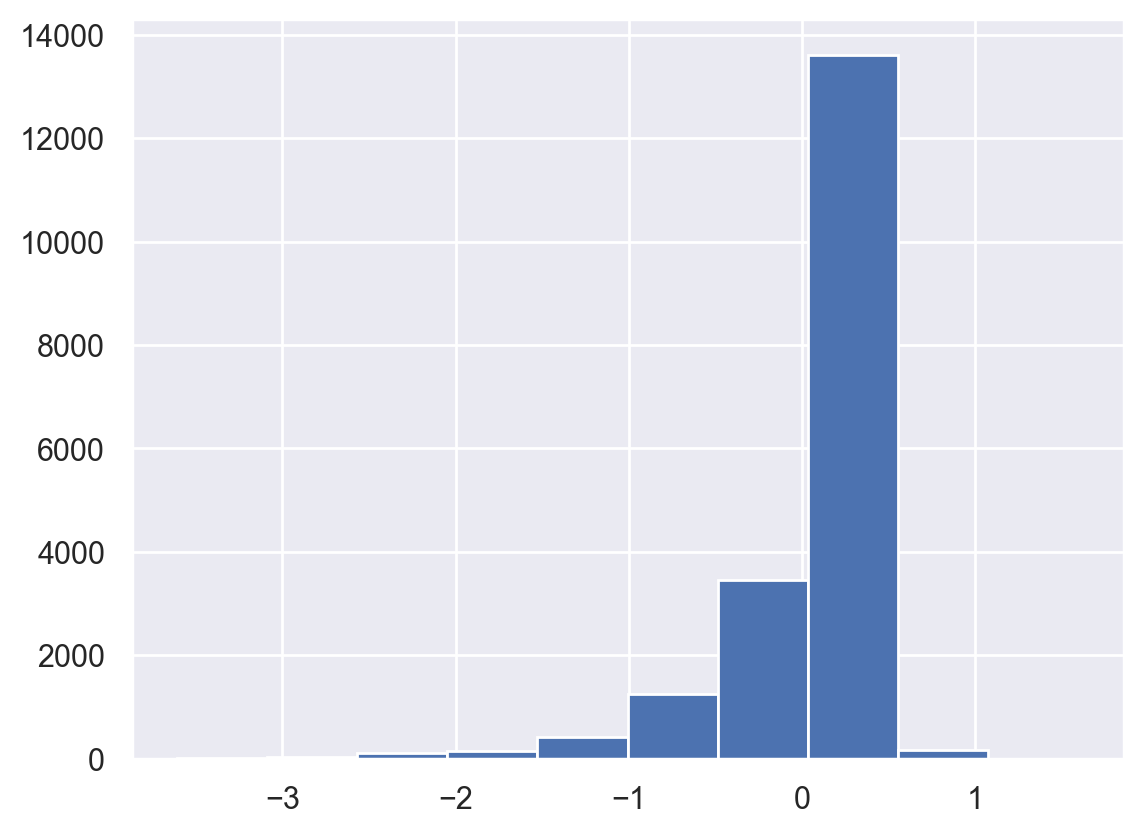

In [63]:
##Regress hours worked against union status and display the results
df2  = pd.DataFrame()
df2['hours'] = np.log(data_nomissHU['hours'])
df2['union'] = data_nomissHU['union']
res = smf.ols("hours ~ union", data=df2).fit()

print(res.summary())
res.resid.hist()

In [48]:
##Print or write out the coefficient on union, standard error, t-stat, p-value and confidence interval

#                 coef    std err          t      P>|t|      [0.025       0.975]
#union          0.0837      0.007     12.145      0.000       0.070       0.097

#### What is the identification assumption for the coefficient on union to be causal?





Our assumption for the causality of the coefficent on union is that it's uncorrelated with error, thus assuming that there aren't any confounders. Our system exogenous to any omitted variables.

In [10]:
## add education (collgrad) to the regression and compare the coefficient on union with the previous result
dfHUC  = pd.DataFrame()
dfHUC['hours'] = np.log(data_nomissHUC['hours'])
dfHUC['union'] = data_nomissHUC['union']
dfHUC['collgrad'] = data_nomissHUC['collgrad']
res2 = smf.ols("hours ~ union + collgrad", data=dfHUC).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                  hours   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     95.64
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           4.70e-42
Time:                        19:21:27   Log-Likelihood:                -9844.0
No. Observations:               19202   AIC:                         1.969e+04
Df Residuals:                   19199   BIC:                         1.972e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5183      0.004    980.244      0.0

In [61]:
## add occupation codes to the regression and compare the results with the previous one
dfHUO  = pd.DataFrame()
dfHUO['hours'] = np.log(data_nomissHUC['hours'])
dfHUO['union'] = data_nomissHUC['union']
dfHUO['occ_code'] = data_nomissHUC['occ_code']
res3 = smf.ols("hours ~ union + occ_code", data=dfHUO).fit()
print(res3.summary())


                            OLS Regression Results                            
Dep. Variable:                  hours   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     86.21
Date:                Mon, 09 Oct 2023   Prob (F-statistic):           5.32e-38
Time:                        16:10:07   Log-Likelihood:                -9809.2
No. Observations:               19129   AIC:                         1.962e+04
Df Residuals:                   19126   BIC:                         1.965e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5481      0.005    675.582      0.0

In [60]:
print(summary_col([res,res2,res3]))


               hours I  hours II hours III
------------------------------------------
Intercept      3.5270   3.5183   3.5481   
               (0.0033) (0.0036) (0.0053) 
R-squared      0.0076   0.0099   0.0089   
R-squared Adj. 0.0076   0.0098   0.0088   
collgrad                0.0486            
                        (0.0074)          
occ_code                         -0.0048  
                                 (0.0009) 
union          0.0837   0.0806   0.0900   
               (0.0069) (0.0069) (0.0070) 
Standard errors in parentheses.


#### In terms of causal inference, why is adding occupation code as a control probably not a good idea?


Occupation is not a confounder, meaning it only affects the treatment which in this case are the excessive working hours, consequently causing an effect on the decision of taking part in an union. 

#### What are "good controls" in the dataset in terms of being exogenous to union status?


In [12]:
##add these controls to the regression

data_nomis = data.dropna(subset=['hours', 'union','race','c_city'])
df  = pd.DataFrame()
df['hours'] = np.log(data_nomis['hours'])
df['union'] = data_nomis['union']
df['race'] = data_nomis['race']
df['c_city'] = data_nomis['c_city']


res4 = smf.ols("hours ~ union + race + c_city ", data=df).fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:                  hours   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     69.73
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.02e-58
Time:                        19:23:28   Log-Likelihood:                -9800.2
No. Observations:               19200   AIC:                         1.961e+04
Df Residuals:                   19195   BIC:                         1.965e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.5050      0.004    862.872

In [14]:
print(summary_col([res2,res4]))


               hours I  hours II
--------------------------------
Intercept      3.5183   3.5050  
               (0.0036) (0.0041)
R-squared      0.0099   0.0143  
R-squared Adj. 0.0098   0.0141  
c_city                  0.0109  
                        (0.0064)
collgrad       0.0486           
               (0.0074)         
race[T.black]           0.0703  
                        (0.0068)
race[T.other]           0.0375  
                        (0.0280)
union          0.0806   0.0752  
               (0.0069) (0.0069)
Standard errors in parentheses.


#### How do these change your estimates?


At first I thought that race was an exogenous variable that didn't affect union, but after the results it seems it could be a confounder. Living in the city is exogenous to both union and working hours.

# Short Essay: Correlation/Causation

**Find a news article mistaking correlation for causation. Link to the article and write a short paragraph explaining the mistake.**

[type your comments here, or attach as separate document.]

https://www.theguardian.com/technology/2014/jun/05/ebay-search-ads-no-benefit-google-brands-berkeley-chicago

In 2013, eBay allocated approximately $50 million annually towards search engine advertising. 
Consultants had conducted an analysis, revealing a positive correlation between the frequency 
of ads displayed and increased sales in specific areas. Nevertheless, 
economists urged the company to scrutinize the cause-and-effect relationship more closely. 
They embarked on an investigation involving natural experiments and initiated 
a new randomized controlled trial, ultimately concluding that these advertisements were largely ineffective.
Contrary to the marketing team's initial convictions, it became evident that the ads were primarily reaching individuals who were already inclined to shop on eBay.